In [1]:
# Análisis exploratorio del dataset de películas (TMDB)
Este cuaderno analiza un dataset consolidado de alrededor 1000 películas extraídas de la API de TMDB para los años 1959, 1970, 1990, 2005 y 2024. El objetivo es explorar sus características

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Carga del dataset
df = pd.read_csv("../data/processed/movies_merged.csv")
df.head()

,id,title,original_title,production_countries,overview,tagline,release_date,original_language,genres,runtime,budget,revenue,cast,vote_average,director,keywords
0,10112,Los aristogatos,The Aristocats,['United States of America'],1910. En París una anciana millonaria y excént...,Una extravagancia animada llena de melodías.,1970-12-24,en,"Animación, Comedia, Familia, Aventura",78,4000000,191000000,"['Phil Harris', 'Eva Gabor', 'Sterling Holloway']",7.287,Wolfgang Reitherman,"['paris, france', 'return', 'butler', 'cartoon..."
1,1685,Regreso al planeta de los simios,Beneath the Planet of the Apes,['United States of America'],Una nueva nave procedente del espacio y del ti...,"El extraño mundo de ""El planeta de los simios""...",1970-04-23,en,"Aventura, Ciencia ficción, Misterio",95,3000000,18999718,"['James Franciscus', 'Kim Hunter', 'Maurice Ev...",6.147,Ted Post,"['dystopia', 'mutant', 'distant future', 'astr..."
2,9062,Love Story,Love Story,['United States of America'],Historia de amor de dos universitarios de Harv...,Amor significa no tener que pedir perdón.,1970-12-16,en,"Romance, Drama",99,2200000,136400000,"['Ali MacGraw', ""Ryan O'Neal"", 'John Marley']",6.821,Arthur Hiller,"['based on novel or book', 'harvard university..."
3,11202,Patton,Patton,['United States of America'],Biografía del general norteamericano George S....,El guerrero rebelde.,1970-01-25,en,"Bélica, Drama, Historia",172,12000000,89800000,"['George C. Scott', 'Stephen Young', 'Frank La...",7.487,Franklin J. Schaffner,"['general', 'steel helmet', 'allies', 'world w..."
4,42589,"Hola, mamá","Hi, Mom!",['United States of America'],"John Rubin, un veterano de la guerra del Vietn...",NaN,1970-04-27,en,"Comedia, Crimen",88,0,0,"['Robert De Niro', 'Jennifer Salt', 'Allen Gar...",6.293,Brian De Palma,"['new york city', 'pornography', 'black panthe..."


In [5]:
print("Películas cargadas: ", len(df))
print("\nColumnas disponibles: ", df.columns.tolist(),"\n")
df.info()

Películas cargadas:  1000

Columnas disponibles:  ['id', 'title', 'original_title', 'production_countries', 'overview', 'tagline', 'release_date', 'original_language', 'genres', 'runtime', 'budget', 'revenue', 'cast', 'vote_average', 'director', 'keywords'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   title                 1000 non-null   object 
 2   original_title        1000 non-null   object 
 3   production_countries  1000 non-null   object 
 4   overview              857 non-null    object 
 5   tagline               363 non-null    object 
 6   release_date          1000 non-null   object 
 7   original_language     1000 non-null   object 
 8   genres                998 non-null    object 
 9   runtime               1000 non-null   int64  
 10  budget           

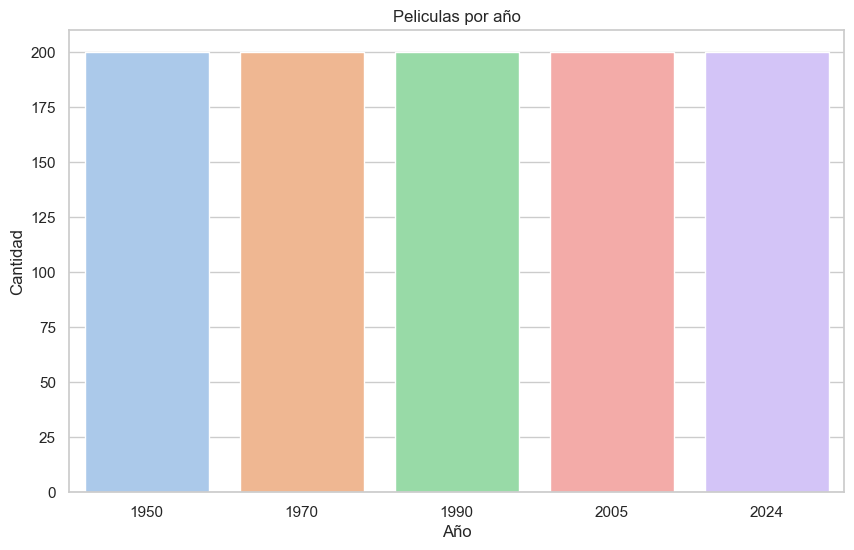

In [7]:
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["release_year"] = df["release_date"].dt.year

sns.countplot(data=df, x="release_year", hue="release_year", palette="pastel", legend= False)
plt.title("Peliculas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

In [9]:
# Valores faltantes por columna

df.isnull().mean().sort_values(ascending=False)

tagline                 0.637
overview                0.143
genres                  0.002
director                0.002
budget                  0.000
keywords                0.000
vote_average            0.000
cast                    0.000
revenue                 0.000
id                      0.000
runtime                 0.000
title                   0.000
original_language       0.000
release_date            0.000
production_countries    0.000
original_title          0.000
release_year            0.000
dtype: float64

In [11]:
# Porcentaje de valores nulos por columna
null_percent = df.isnull().mean().sort_values(ascending=False)*100
null_percent[null_percent > 0].round(2)

tagline     63.7
overview    14.3
genres       0.2
director     0.2
dtype: float64

In [18]:
**Nota**: Hay valores ausentes en tagline, overview, genres y director. Evaluaremos más adelante si rellenarlos, eliminarlos o ignorarlos en el entrenamiento.

SyntaxError: invalid syntax (3373989955.py, line 1)

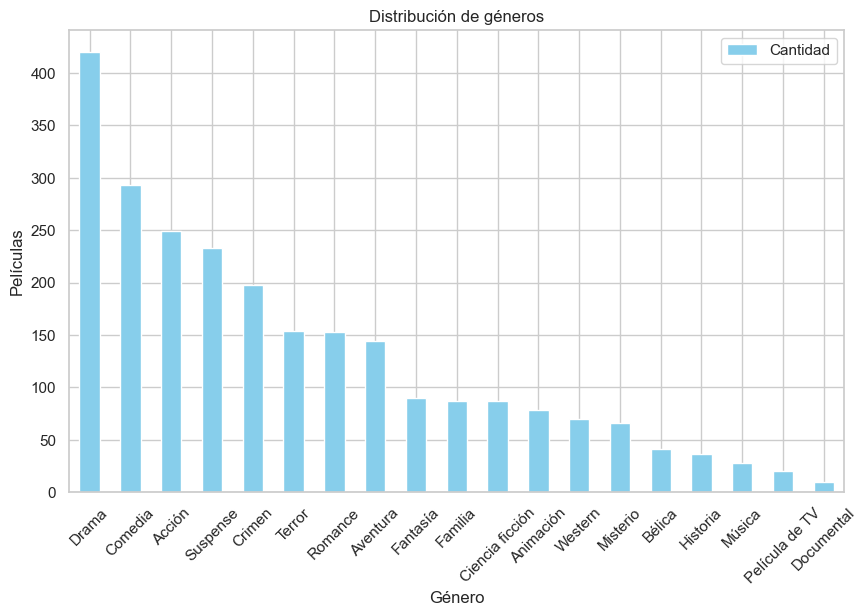

In [13]:
# Distribución de géneros

from collections import Counter
import ast

all_genres = []
for entry in df["genres"].dropna():
    genres = [g.strip() for g in entry.split(",")]
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
pd.DataFrame(genre_counts.most_common(), columns=["Género", "Cantidad"]).set_index("Género").plot(kind="bar", color="skyblue")
plt.title("Distribución de géneros")
plt.ylabel("Películas")
plt.xticks(rotation=45)
plt.show()

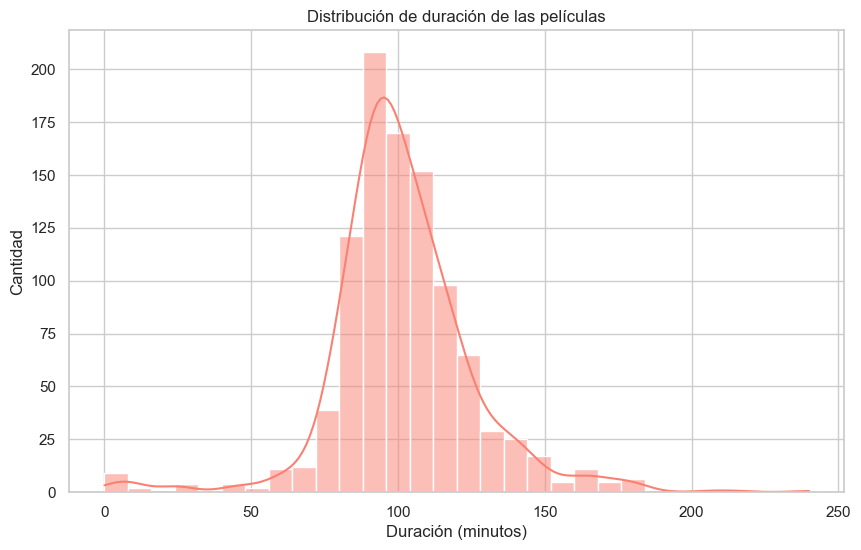

In [15]:
# Duración de las películas

sns.histplot(df["runtime"].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribución de duración de las películas")
plt.xlabel("Duración (minutos)")
plt.ylabel("Cantidad")
plt.show()

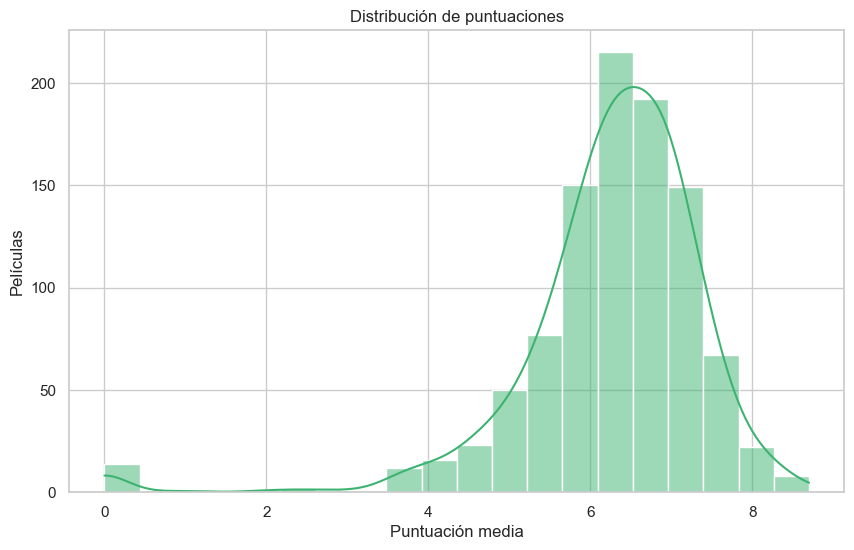

In [17]:
# Puntuaciones

sns.histplot(df["vote_average"], bins=20, kde= True, color="mediumseagreen")
plt.title("Distribución de puntuaciones")
plt.xlabel("Puntuación media")
plt.ylabel("Películas")
plt.show()

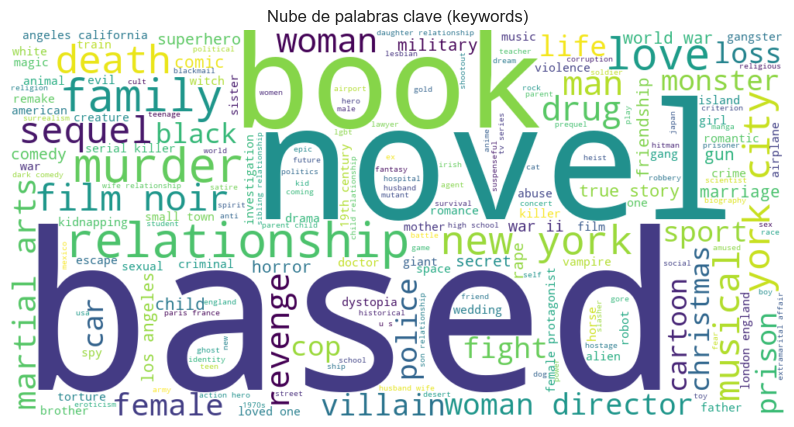

In [19]:
# Exploración de palabras clave

from wordcloud import WordCloud

keywords = []
for entry in df["keywords"].dropna():
    try:
        kws = ast.literal_eval(entry)
        keywords.extend(kws)
    except:
        continue

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(" ".join(keywords))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de palabras clave (keywords)")
plt.show()

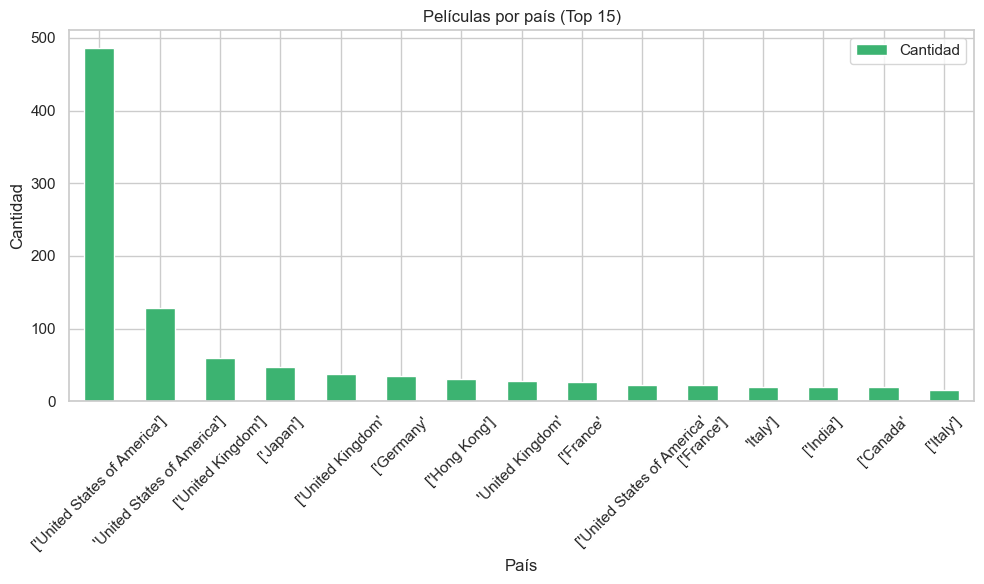

In [21]:
# Conteo por países

all_countries = []
for entry in df["production_countries"].dropna():
    countries = [c.strip() for c in entry.split(",")]
    all_countries.extend(countries)

country_counts = Counter(all_countries)

top_countries = country_counts.most_common(15)

# Graficar
pd.DataFrame(top_countries, columns=["País", "Cantidad"]).set_index("País").plot(
    kind="bar", color="mediumseagreen"
)

plt.title("Películas por país (Top 15)")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
paises_unicos = set()

for entry in df["production_countries"].dropna():
    for pais in entry.split(","):
        paises_unicos.add(pais.strip())

print(sorted(paises_unicos))

["'Australia'", "'Australia']", "'Belgium'", "'Brazil'", "'Brazil']", "'Canada'", "'Canada']", "'China'", "'Colombia'", "'Cyprus']", "'Czech Republic']", "'Denmark'", "'Ecuador'", "'Finland'", "'Finland']", "'France'", "'France']", "'Germany'", "'Germany']", "'Hong Kong'", "'Hong Kong']", "'Ireland']", "'Italy'", "'Italy']", "'Japan'", "'Japan']", "'Liechtenstein'", "'Luxembourg']", "'Mexico'", "'Mexico']", "'Morocco'", "'Netherlands']", "'New Zealand'", "'Norway'", "'Peru'", "'Poland'", "'Poland']", "'Puerto Rico']", "'Romania'", "'Romania']", "'South Africa']", "'Soviet Union'", "'Soviet Union']", "'Spain'", "'Spain']", "'Sweden'", "'Sweden']", "'Switzerland'", "'Taiwan']", "'Thailand']", "'Tunisia']", "'Turkey']", "'United Arab Emirates'", "'United Kingdom'", "'United Kingdom']", "'United States of America'", "'United States of America']", "'Yugoslavia']", "['Argentina'", "['Argentina']", "['Australia'", "['Australia']", "['Austria'", "['Belgium'", "['Brazil'", "['Bulgaria'", "['Can

In [ ]:
**Nota**: Los países están mal formateados, y eso provoca repeticiones. 

In [36]:
# Conclusiones finales del análisis

- El dataset contiene **1000 películas** con metadatos relevantes como géneros, reparto, país, duración, ingresos y keywords.
- Hay una buena representación de cinco décadas (1950, 1970, 1990, 2005, 2024).
- Existen algunas columnas con valores nulos.
- Los países están mal formateados.    
- Los géneros más comunes son Drama, Comedia, Acción, Suspense y Crimen.
- Las notas media se concrentran entre 4 y 8.
- La duración de las películas varía ampliamente, destacando los 90 minutos.
- Tras el análisis de palabras clave podemos determinar que destacan las palículas basadas en libros.    

Con esto podremos diseñar un modelo de recomendación personalizado.    

SyntaxError: invalid syntax (3516245329.py, line 3)